(!) Needs Fixing! Need all ratio data and not just averaged ratio data

In [96]:
# Imports 
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

import numpy as np
import pandas as pd

import cmdstanpy
import arviz as az

import iqplot
import bebi103

import bokeh.io
import bokeh.plotting

# bokeh.io.output_notebook()

# Import seaborn for aesthetic plots 
import seaborn as sns

from tqdm.notebook import tqdm

import pandas as pd
import ast

from bokeh.plotting import figure, show, curdoc
from bokeh.io import output_notebook
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256
from bokeh.themes import Theme
from bokeh.layouts import column, row
from bokeh.models import Range1d
bokeh.io.output_notebook()

import scipy as sp
import matplotlib.pyplot as plt

import scipy.stats as st

# Plotting params
size = 500;

Loading BokehJS ...

In [97]:
# Read data 
data_location = '../../analyzed_data/atp-hydro/ATP_withstd.csv';

# data_location = '../../analyzed_data/atp-hydro/ATP.csv';
# Read the CSV file into a DataFrame
df1 = pd.read_csv(data_location); 

# data_location = '../../analyzed_data/atp-hydro/ADP.csv';
# # Read the CSV file into a DataFrame
# df2 = pd.read_csv(data_location); 

# data_location = '../../analyzed_data/atp-hydro/Phosphate.csv';
# # Read the CSV file into a DataFrame
# df3 = pd.read_csv(data_location); 

#### ------------- Load and Read Data ------------- ####
ATP_conc_list = []
ADP_conc_list = []
P_conc_list = []
ATP_curve_list = []
ATP_curve_std_list = []
ratio_curve_list = []
ratio_std_curve_list = []
linear_r2_list = []
exponential_r2_list = []
linear_hydrolysis_rate_list = []
exponential_hydrolysis_rate_list = []
times_list = []
data_locations_list = []

for df in [df1]:
# for df in [df1, df2, df3]:
# for df in [df1, df2]:  # without phosphate data
    # ATP Concentrations
    ATP_conc_list.append(np.array(df["ATP Concentration (uM)"])); 

    # ADP Concentrations
    ADP_conc_list.append(np.array(df["ADP Concentration (uM)"])); 

    # Phosphate Concentrations
    P_conc_list.append(np.array(df["P Concentration (uM)"])); 

    # ATP Curves
    ATP_curve_list.append([ast.literal_eval(df["ATP Curve (uM)"][i]) for i in range(len(df))])

    print(df["ATP Curve Std (uM)"])
    ATP_curve_std_list.append([ast.literal_eval(df["ATP Curve Std (uM)"][i]) for i in range(len(df))])

    # Ratio Curves
    ratio_curve_list.append([ast.literal_eval(df["Ratio (A.U.)"][i]) for i in range(len(df))])

    # Ratio Std Curves
    ratio_std_curve_list.append([ast.literal_eval(df["Standard Deviation in Ratio (A.U.)"][i]) for i in range(len(df))])

    # Goodness of Fit
    linear_r2_list.append(np.array(df["r-squared for linear fit"])); 
    exponential_r2_list.append(np.array(df["r-squared for exponential fit"])); 

    # Hydrolysis Rate
    linear_hydrolysis_rate_list.append(np.array(df["Hydrolysis Rate (uM/s/motor) from Linear Fitting (-abs(Slope)/Motconc)"])); 
    exponential_hydrolysis_rate_list.append(np.array(df["Hydrolysis Rate (uM/s/motor) from Exponential Curve"])); 

    # Time
    times_list.append([ast.literal_eval(df["Time Array (s)"][i]) for i in range(len(df))])
    
    # Data location
    data_locations_list.append(df["Data Location"])

    
times_list = [item for sublist in times_list for item in sublist];
ATP_conc_list = [item for sublist in ATP_conc_list for item in sublist]; 
ADP_conc_list = [item for sublist in ADP_conc_list for item in sublist];
P_conc_list = [item for sublist in P_conc_list for item in sublist];
ATP_curve_list = [item for sublist in ATP_curve_list for item in sublist];
ATP_curve_std_list = [item for sublist in ATP_curve_std_list for item in sublist];

ratio_curve_list = [item for sublist in ratio_curve_list for item in sublist];
ratio_std_curve_list = [item for sublist in ratio_std_curve_list for item in sublist];
linear_r2_list = [item for sublist in linear_r2_list for item in sublist];
exponential_r2_list = [item for sublist in exponential_r2_list for item in sublist];
linear_hydrolysis_rate_list = [item for sublist in linear_hydrolysis_rate_list for item in sublist];
exponential_hydrolysis_rate_list = [item for sublist in exponential_hydrolysis_rate_list for item in sublist];
data_locations_list = [item for sublist in data_locations_list for item in sublist]; 

0    [61211.154652359897934, 30728.7494856160352, 5...
Name: ATP Curve Std (uM), dtype: object


In [104]:
ratio_std_curve_list

[[0.23241424388910928,
  0.27591450922458455,
  0.27365488235442015,
  0.2726263254109753,
  0.26968382352239073,
  0.26750154616431876,
  0.26482227847663414,
  0.2622041164375564,
  0.2590983214497613,
  0.2558619210083072,
  0.25290365017709265,
  0.2501596779573994,
  0.24889910120569528,
  0.24482613853757804,
  0.24291027439342794,
  0.24080064547576033,
  0.23851878000171245,
  0.2332848039409794,
  0.23029753691926394,
  0.22735296500070795,
  0.22525593563931504,
  0.2218623416114133,
  0.21837990443570926,
  0.21659049670037284,
  0.21429481643861212,
  0.2101378356084587,
  0.20833424181317958,
  0.20542023761567577,
  0.20183037934504247,
  0.19942545463560074,
  0.19415164033336474,
  0.19277902458449894,
  0.18952576655170236,
  0.18656907824053856,
  0.1827225818756536,
  0.18093535641686387,
  0.17850389925635532,
  0.17596440530557025,
  0.1730094427554653,
  0.16958028185217655,
  0.16705218568068267,
  0.16421035440053414,
  0.1619107304393122,
  0.1591350440572282,


In [106]:
for i, ratio in enumerate(ratio_curve_list): 
    ratio = np.array(ratio)[:80]; 
    ratio_std = np.array(ratio_std_curve_list[i])[:80]; 

    p = figure(title = "Standard Deviation in Ratio"); 
    p.xaxis.axis_label = "Index"; 
    p.yaxis.axis_label = "Bound to Unbound Channel Ratio"; 

    p.line(np.arange(len(ratio)), ratio, color = "black")
    
    source = bokeh.plotting.ColumnDataSource({
        'base': np.arange(len(ratio)),
        'lower':ratio - ratio_std,
        'upper':ratio + ratio_std,
        })
    band = bokeh.models.Band(base='base', lower='lower', upper='upper', 
        source=source, fill_alpha=0.5, fill_color = "orange")

    p.add_layout(band)
    # p.y_range = Range1d(0, 2)
    p.title.text_font_size = '15pt'

    p.xaxis.axis_label_text_font_size = "15pt"
    p.yaxis.axis_label_text_font_size = "15pt"
    p.xaxis.major_label_text_font_size = '20px'
    p.yaxis.major_label_text_font_size = '20px'

    show(p)

    p = figure(title = f"ATP vs Time, ATP(0) = {ATP_conc_list[i]}")

    p.xaxis.axis_label = "Time (s)"; 
    p.yaxis.axis_label = "ATP (uM)"; 

    # time = times_list[i]
    atp = np.array(ATP_curve_list[i])[:99]; 
    atp_std = np.array(ATP_curve_std_list[i])[:99]; 

    p.line(times_list[i], ATP_curve_list[i], color = "black")

    source = bokeh.plotting.ColumnDataSource({
        'base': times_list[i],
        'lower':atp - atp_std,
        'upper':atp + atp_std,
        })
    band = bokeh.models.Band(base='base', lower='lower', upper='upper', 
        source=source, fill_alpha=0.5, fill_color = "orange")

    p.add_layout(band)
    # p.y_range = Range1d(0, 2)
    p.title.text_font_size = '15pt'

    p.xaxis.axis_label_text_font_size = "15pt"
    p.yaxis.axis_label_text_font_size = "15pt"
    p.xaxis.major_label_text_font_size = '20px'
    p.yaxis.major_label_text_font_size = '20px'

    show(p)

    

In [107]:
print(atp_std)

[6.12111547e+04 3.07287495e+04 5.32659820e+04 4.28439928e+04
 2.31805644e+04 1.69110939e+04 1.61789989e+06 1.01420523e+04
 2.47002049e+04 2.16390175e+04 1.38677390e+04 1.18512610e+04
 1.31103565e+04 2.26901302e+04 7.35356697e+03 1.18411216e+04
 7.11870858e+03 8.79451908e+03 5.94039238e+03 4.97481192e+03
 1.76896196e+03 3.61650099e+03 2.62753171e+03 2.40631826e+03
 5.41291320e+02 6.57246466e+02 4.64839425e+03 2.80585865e+02
 4.56170993e+02 1.33009533e+02 1.36748800e+02 2.70519259e+02
 5.83886826e+01 1.06121289e+02 6.17337114e+01 4.09330821e+01
 2.94729977e+01 1.65962613e+02 4.13330273e+01 2.39239493e+01
 2.21925113e+01 1.95270736e+01 8.80971690e+01 1.80258944e+01
 1.64040245e+01 1.51732293e+01 1.42019067e+01 1.34486317e+01
 1.28455999e+01 1.41485797e+01 1.17395562e+01 1.11739703e+01
 1.26632499e+01 1.02712814e+01 9.87687505e+00 9.35743120e+00
 8.98587175e+00 8.72221033e+00 8.38636270e+00 7.99674346e+00
 7.70669034e+00 7.45240353e+00 7.21900688e+00 6.97250214e+00
 6.75283651e+00 6.550577

In [8]:
ATP_end = 10; # define noise floor
start_index = 2; # throw away first few points

estimation_data = []; 

for i, curve in enumerate(ATP_curve_list): 
                
    conditions = np.zeros(2); 
    
    #### Quality control of data
    
    # Get end index
    if len(np.where(np.array(curve) < ATP_end)[0]) != 0:
        end_index = np.where(np.array(curve) < ATP_end)[0][0]
    else: 
        end_index = -1
    
    # Curve should have enough points
    if len(np.array(curve[start_index:end_index])) > 5:

        conditions[0] = 1;
    
        # Ensure initial ATP isn't too high
        if curve[start_index] < ATP_conc_list[i]:
            conditions[1] = 1;
    
            # Append data
            estimation_data.append({
                "atp": np.array(curve[start_index:end_index]), 
                "ratio": np.array(ratio_curve_list[i][start_index:end_index]), 
                "time": np.array(times_list[i])[start_index:end_index],
                "atp0": ATP_conc_list[i],
                "adp0": ADP_conc_list[i],
                "p0": P_conc_list[i],
            })
            
        
        
data = pd.DataFrame(estimation_data)

In [9]:
p = figure()

ratio_std_array = np.zeros(len(estimation_data)); 
for i in range(len(estimation_data)): 
    ratio_std_array[i] = np.std(estimation_data[i]["ratio"][:90])
    p.line(estimation_data[i]["time"][:90], estimation_data[i]["ratio"][:90])
    # print(i)
show(p)
    # break

show(iqplot.ecdf(ratio_std_array, title = "Standard Deviation for Ratio Curves"))
print("Mean standard deviation: ", np.mean(ratio_std_array)); 

Mean standard deviation:  nan


/Users/mashok/opt/anaconda3/envs/bebi103/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mashok/opt/anaconda3/envs/bebi103/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


The standard deviations look uniformly distributed between 0 and 0.6. We will choose the mean value, 0.3, henceforth. 

For the range of admissible ratio values (which is determined by the calibration parameters), we will consider a std of 0.3 and visualise the std in the ATP curve. 

In [10]:
# Function to convert ratio to ATP concentration
def ATP_inten_to_conc(array, a, b, c, d):
    epsilon = 1e-10  # Small constant to avoid division by zero
    argument = (c - array) / (array - b + epsilon);
    argument[argument < 0] = np.nan; 
 
    result = a * np.power(1e-6 + argument,(1/d), dtype=np.float128)
    result = np.clip(result, np.finfo(result.dtype).min, np.finfo(result.dtype).max)
    return result


[2.67099476e+04 2.12636563e+03 2.89840669e+03 2.56055293e+03
 2.70564884e+03 1.09854717e+04 2.99975156e+03 1.06581509e+04
 3.04122331e+03 4.53365812e+03 2.46965638e+03 2.14547490e+03
 2.87931076e+03 7.01451324e+03 2.24270323e+03 2.16691955e+03
 1.16091942e+04 4.16653708e+03 7.42196971e+03 3.44478686e+03
 8.63845463e+04 1.63660185e+03 1.06352851e+04 1.06272131e+04
 2.69528911e+03 2.85464935e+03 1.15059544e+04 6.02369282e+03
 9.25882600e+03 3.14451327e+03 2.01749909e+03 1.60089615e+03
 5.44319219e+03 1.16463017e+04 2.55953747e+04 5.94389101e+03
 1.07732235e+05 1.87775688e+03 7.01315967e+03 2.80799170e+03
 6.32337636e+03 3.82246838e+03 8.32792869e+03 1.09365624e+03
 1.80441979e+03 1.64306336e+03 1.71299871e+03 3.81261180e+03
 2.83628235e+03 1.67253702e+03 2.53693450e+05 3.05042729e+03
 1.80462683e+03 2.54477674e+03 2.79702954e+03 2.21687332e+03
 1.34198686e+03 3.26972221e+03 1.21973283e+03 1.66400790e+03
 4.91443388e+03 2.46739911e+03 1.45712366e+03 2.41004624e+03
 9.77034546e+03 3.343659

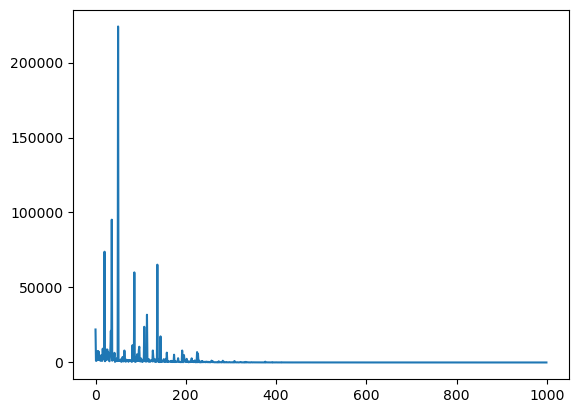

In [105]:
# Parameters taken from the file where bulk processing took place. 
cal_params = [67.60201128,  3.36417414,  1.06783864,  1.17289855]; 
a, b, c, d = cal_params; 
ratio_range = np.arange(b, c, -(b-c)/1000)

n_draws = 100; 

atp_post_callibration_array = np.zeros(((len(ratio_range)), n_draws))

p1 = figure()
p2 = figure()

ratio_draw_array = np.zeros(((len(ratio_range)), n_draws))
for i in range(n_draws): 
    
    ratio_draw = np.random.default_rng().normal(loc=ratio_range, scale=0.25)
    # ratio_draw.sort()
    # ratio_draw = ratio_draw[-1:]
    ratio_draw_array[:, i] = ratio_draw

    atp_post_callibration_array[:, i] = ATP_inten_to_conc(ratio_draw, a, b, c, d)

    # p2.circle(ratio_range, atp_post_callibration_array[:, i])
    # p2.line(ratio_range, atp_post_callibration_array[:, i], line_dash="dashed")

drawn_ratio_mean = np.mean(ratio_draw_array, axis=1); 
drawn_ratio_std = np.std(ratio_draw_array, axis=1); 

p1.line(np.arange(len(ratio_draw)), np.mean(ratio_draw_array, axis=1), line_dash="solid", color = "black")

source = bokeh.plotting.ColumnDataSource({
        'base': np.arange(len(ratio_draw)),
        'lower':drawn_ratio_mean - drawn_ratio_std,
        'upper':drawn_ratio_mean + drawn_ratio_std,
        })

band = bokeh.models.Band(base='base', lower='lower', upper='upper', 
    source=source, fill_alpha=0.5, fill_color = "orange")

p1.add_layout(band)
# p1.y_range = Range1d(0, 2)
p1.title.text_font_size = '15pt'

p1.xaxis.axis_label_text_font_size = "15pt"
p1.yaxis.axis_label_text_font_size = "15pt"
p1.xaxis.major_label_text_font_size = '20px'
p1.yaxis.major_label_text_font_size = '20px'

# Remove nans
# atp_post_callibration_array = atp_post_callibration_array[np.isnan(atp_post_callibration_array)]
# print(atp_post_callibration_array.shape)
# Calculate mean and std
drawn_atp_mean = np.nanmean(atp_post_callibration_array, axis = 1); 
drawn_atp_std = np.nanstd(atp_post_callibration_array, axis = 1); 

p2.line(np.arange(len(drawn_atp_mean)), drawn_atp_mean, line_dash="solid", color = "black")
p2.line(np.arange(len(drawn_atp_mean)), drawn_atp_mean - drawn_atp_std, line_dash="solid", color = "orange")
p2.line(np.arange(len(drawn_atp_mean)), drawn_atp_mean + drawn_atp_std, line_dash="solid", color = "orange")

plt.plot(drawn_atp_std)
source = bokeh.plotting.ColumnDataSource({
        'base': np.arange(len(drawn_atp_mean)),
        'lower':drawn_atp_mean - drawn_atp_std,
        'upper':drawn_atp_mean + drawn_atp_std,
        })

band = bokeh.models.Band(base='base', lower='lower', upper='upper', 
    source=source, fill_alpha=0.5, fill_color = "orange")
p2.add_layout(band)

p2.y_range = Range1d(0, 2000) 

show(p1)
show(p2)

print(drawn_atp_mean + drawn_atp_std)
print(drawn_atp_mean - drawn_atp_std)



In [12]:
print(atp_post_callibration_array)

[[           nan 3.57676237e-01 1.90909287e-01 ...            nan
  9.15654489e-01 2.78792218e-01]
 [1.98662136e-01            nan            nan ...            nan
  2.08692969e-01            nan]
 [1.08364463e+00 3.40909073e-01            nan ...            nan
  1.40170840e+00 7.93072568e-01]
 ...
 [6.42573359e+03            nan            nan ... 4.57737908e+04
  8.71696674e+03 2.95962402e+04]
 [1.30760505e+04            nan            nan ... 3.40507130e+03
  6.91416127e+03 1.26076232e+04]
 [9.00987312e+03            nan            nan ... 1.33814179e+04
  4.07469062e+03 8.68107643e+03]]


In [17]:
mean_atp = np.mean(np.nan_to_num(atp_post_callibration_array), axis = 1)
min_atp = np.min(np.nan_to_num(atp_post_callibration_array), axis = 1)
max_atp = np.max(np.nan_to_num(atp_post_callibration_array), axis = 1)
std_atp = np.std(np.nan_to_num(atp_post_callibration_array), axis = 1)
# print(mean_atp)
print(np.where(mean_atp > 2000))
index = np.where(mean_atp > 2000)[0][0] - 10; 
# s 
# plt.plot(std_atp)
p = figure(title = "Calibration Curve converting Channel Ratio to [ATP]")
# Shade std 
source = bokeh.plotting.ColumnDataSource({
    'base': ratio_range[:index],
    'lower':mean_atp[:index] - std_atp[:index],
    'upper':mean_atp[:index] + std_atp[:index],
    })
band = bokeh.models.Band(base='base', lower='lower', upper='upper', 
    source=source, fill_alpha=0.5, fill_color = "orange")

p.add_layout(band)

p.line(mean_atp[:index], ratio_range[:index], color = "black", line_width=2); 
p.xaxis.axis_label = "ATP (uM)"
p.yaxis.axis_label = "Ratio (A.U.)"
p.xaxis.axis_label_text_font_size = "15pt"
p.yaxis.axis_label_text_font_size = "15pt"
p.title.text_font_size = '15pt'

p.xaxis.axis_label_text_font_size = "15pt"
p.yaxis.axis_label_text_font_size = "15pt"
p.xaxis.major_label_text_font_size = '20px'
p.yaxis.major_label_text_font_size = '20px'

# p.line(min_atp[:index], ratio_range[:index], color = "red"); 
# p.line(max_atp[:index], ratio_range[:index], color = "red"); 

# bokeh.plotting.save(p)
show(p)
# break

(array([982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994,
       995, 996, 997, 998, 999]),)


In [14]:
p = figure(title = "Range of ATP values vs Ratio")
p.line((max_atp - min_atp)[:index], ratio_range[:index], color = "red"); 

show(p)

In [15]:
show(p)